# 1. Introducción al Dataset y Carga de Datos

In [1]:
# Importamos pandas para manejar el dataset
import pandas as pd

# Cargamos el dataset desde el archivo xlsx
# Nota: Modifique la ruta al archivo si fuese necesario
df = pd.read_excel('data/Datos_proyecto.xlsx')

# Mostramos las primeras filas para conocer la estructura de los datos
print("Primeras 5 filas del dataset:")
display(df.head())

# Obtención de información general sobre las columnas y tipos de datos
print("\nInformación general del dataset:")
df.info()

Primeras 5 filas del dataset:


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


In [2]:
# Poner una columna de id
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)
df['id'] = df['id'] + 1  # Empezar IDs desde 1
#df.set_index('id', inplace=True)
print("\nDataset con columna de ID:")
display(df.head())  # Mostrar las primeras filas con la nueva columna de ID


Dataset con columna de ID:


,id,textos,labels
0,1,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,2,Para los niños más pequeños (bebés y niños peq...,4
2,3,"Además, la formación de especialistas en medic...",3
3,4,En los países de la OCDE se tiende a pasar de ...,4
4,5,Este grupo se centró en las personas que padec...,3


# 2. Análisis descriptivo de las opiniones

En esta sección nos centraremos en analizar el campo "textos" del dataset. Este campo contiene una opinión en español. Nuestro objetivo es entender la calidad, cantidad y características textuales de esta información para preparar análisis posteriores.

## Objetivos:

- Identificar cantidad y proporción de valores nulos o vacíos en la columna "textos".  
- Calcular estadísticas básicas como longitud del texto: media, mínimo y máximo.  
- Mostrar visualmente algunas muestras representativas para observar variedades y características del texto.  

## Desarrollo:

1. Se verifican nulos o cadenas vacías en la columna de descripción para evaluar calidad y completitud.  
2. Se calculan estadísticas básicas de longitud de cada opinión para conocer dispersión y valores extremos.  

In [3]:
import matplotlib.pyplot as plt

# Verificamos nulos y vacíos en la columna textos
num_nulls = df['textos'].isnull().sum()
num_empty = (df['textos'].str.strip() == '').sum()

print(f"Número de valores nulos en 'textos': {num_nulls}")
print(f"Número de valores vacíos en 'textos': {num_empty}")

# Calculamos longitud de cada texto
df['text_length'] = df['textos'].str.len()

# Estadísticas básicas sobre la longitud
text_length_stats = df['text_length'].describe()
print("\nEstadísticas básicas de longitud de texto:")
print(text_length_stats)

# Visualización de algunas muestras representativas
print("\nEjemplos de textos:")
display(df[['textos', 'labels']].sample(5, random_state=42))

Número de valores nulos en 'textos': 0
Número de valores vacíos en 'textos': 0

Estadísticas básicas de longitud de texto:
count    2424.000000
mean      683.223185
std       223.563695
min       303.000000
25%       513.000000
50%       647.000000
75%       809.250000
max      1492.000000
Name: text_length, dtype: float64

Ejemplos de textos:


,textos,labels
1490,"Por lo general, se entiende que los trastornos...",3
387,"En la mayoría de los contratos, el objetivo es...",3
1419,Las tasas de consumo de alcohol y tabaquismo n...,3
410,Hubo una disminución constante en el porcentaj...,4
482,La oferta insuficiente de programas vocacional...,4


# 3. Procesamiento de texto: tokenización y limpieza de palabras

En esta sección se va a procesar texto para análisis basados en palabras. Usaremos el campo "textos" y transformaremos cada texto en una lista de palabras limpias y significativas. Este paso es fundamental para realizar un análisis posterior de frecuencia y relevancia de palabras.

## Objetivos:

- Tokenizar las descripciones: separar cada texto en palabras individuales.  
- Limpiar el texto: pasar a minúsculas, eliminar signos de puntuación y palabras vacías (stopwords).  
- Crear un dataframe con las palabras procesadas para análisis posteriores.

## Desarrollo:

1. Importar librerías necesarias para procesamiento de texto, como `nltk`.  
2. Descargar y definir las stopwords en español.
3. Definir función para limpiar y tokenizar el texto.  
4. Aplicar la función a la columna "textos" y almacenar el resultado en una nueva columna.  
5. Crear un dataframe de palabras tokenizadas para análisis posterior.

In [4]:
import nltk
import string
import unicodedata
from nltk.corpus import stopwords

# Descargar stopwords si no están ya descargadas
nltk.download('stopwords')

# Definir las stopwords en inglés (porque las descripciones suelen estar en inglés)
stop_words = set(stopwords.words('spanish'))

def strip_accents(s: str) -> str:
    # Normaliza áéíóúñ -> aeioun (conservando ñ manualmente)
    s = s.replace("ñ", "ny")  # truco para no perderla al normalizar
    s = unicodedata.normalize('NFD', s).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    s = s.replace("ny", "ñ")
    return s

# Función para limpiar y tokenizar texto
def clean_tokenize(text):
    if pd.isnull(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    #quitar tildes
    tokens = [strip_accents(word) for word in tokens]
    return tokens

# Aplicar la función a la columna Description
df['tokens'] = df['textos'].apply(clean_tokenize)

print("Ejemplos de tokens en los primeros textos:")
display(df[['textos', 'tokens']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ejemplos de tokens en los primeros textos:


,textos,tokens
0,"""Aprendizaje"" y ""educación"" se consideran sinó...","[aprendizaje, educacion, consideran, sinonimos..."
1,Para los niños más pequeños (bebés y niños peq...,"[niños, pequeños, bebes, niños, pequeños, capa..."
2,"Además, la formación de especialistas en medic...","[ademas, formacion, especialistas, medicina, g..."
3,En los países de la OCDE se tiende a pasar de ...,"[paises, ocde, tiende, pasar, cursos, obligato..."
4,Este grupo se centró en las personas que padec...,"[grupo, centro, personas, padecen, trastornos,..."


# 4. Análisis exploratorio de palabras más frecuentes y representativas

En esta sección exploraremos las palabras extraídas en la tokenización y limpieza de los textos. Nuestro objetivo es identificar las palabras que aparecen con mayor frecuencia y que mejor se asocian al objetivo de desarrollo sostenible.

## Objetivos:

- Calcular la frecuencia de aparición de cada palabra en todos los textos.  
- Visualizar las palabras más frecuentes mediante tablas y gráficos.  
- Analizar la relevancia de las palabras para entender el vocabulario característico del dataset.

## Desarrollo:

1. Aplanar la lista de tokens en una sola lista.  
2. Contar la frecuencia de cada palabra usando `Counter` de la librería `collections`.  
3. Mostrar las 20 palabras más comunes en una tabla.  
4. Graficar con una barra las palabras más frecuentes.

Las 20 palabras más frecuentes en los textos:


,Word,Frequency
0,salud,1107
1,pobreza,1019
2,educacion,992
3,paises,962
4,atencion,900
5,estudiantes,741
6,ocde,587
7,escuelas,586
8,años,559
9,servicios,548


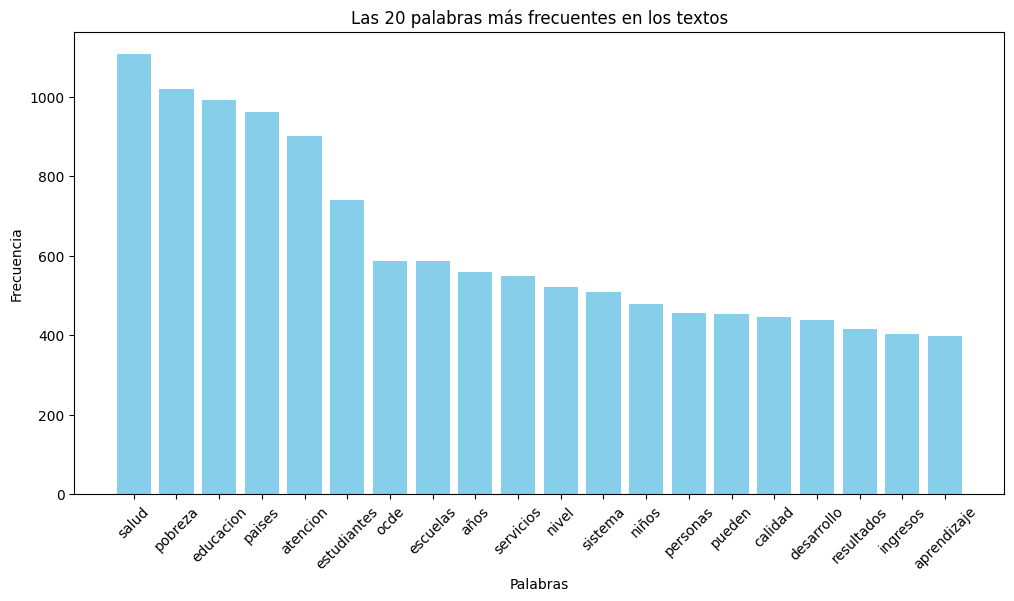

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Aplanar la lista de tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]

# Contar frecuencia de palabras
word_counts = Counter(all_tokens)

# Obtener las 20 palabras más comunes
most_common_words = word_counts.most_common(20)

# Crear dataframe para visualización
freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

print("Las 20 palabras más frecuentes en los textos:")
display(freq_df)

# Graficar las palabras más frecuentes
plt.figure(figsize=(12,6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Las 20 palabras más frecuentes en los textos')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

# 5. Descripción de la variable objetivo


Distribución de niveles de label:
labels
4    1025
3     894
1     505
Name: count, dtype: int64


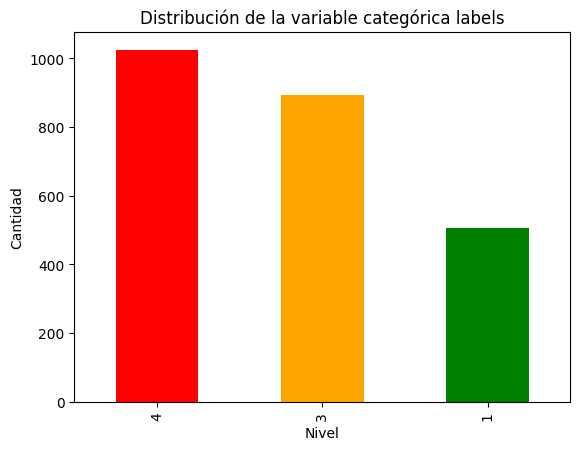

In [6]:
# Mostrar conteos
print("\nDistribución de niveles de label:")
print(df['labels'].value_counts())

# Graficar distribución
df['labels'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Distribución de la variable categórica labels')
plt.xlabel('Nivel')
plt.ylabel('Cantidad')
plt.show()

# Limpieza más robusta

In [7]:
# STEMMING

import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

# Descargas seguras (solo si faltan)
try:
    _ = stopwords.words('spanish')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize("hola")
except LookupError:
    nltk.download('punkt')

STOP_ES = set(stopwords.words('spanish'))
STEM = SnowballStemmer('spanish')

# --- Utilidades de limpieza
def strip_accents(s: str) -> str:
    # Normaliza áéíóúñ -> aeioun (conservando ñ manualmente)
    s = s.replace("ñ", "ny")  # truco para no perderla al normalizar
    s = unicodedata.normalize('NFD', s).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    s = s.replace("ny", "ñ")
    return s

def basic_clean(text: str) -> str:
    text = text.lower()
    text = strip_accents(text)
    # Quitar URLs, menciones, hashtags, números
    text = re.sub(r"(http|https)://\S+|www\.\S+", " ", text)
    text = re.sub(r"[@#]\w+", " ", text)
    text = re.sub(r"\d+", " ", text)
    # Dejar solo letras y espacios
    text = re.sub(r"[^a-zñáéíóúü\s]", " ", text)
    # Colapsar espacios
    text = re.sub(r"\s+", " ", text).strip()
    return text

def tokenize_filter_stem(text: str) -> str:
    # Tokenizar
    toks = word_tokenize(text, language='spanish')
    # Filtrar: solo alfabético, quitar stopwords y tokens de 1-2 letras (ruido)
    toks = [t for t in toks if t.isalpha() and t not in STOP_ES and len(t) > 2]
    # Stemming español
    toks = [STEM.stem(t) for t in toks]
    return " ".join(toks)

def clean_pipeline(text: str) -> str:
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)
    return tokenize_filter_stem(basic_clean(text))

df['texto_stemming'] = df['textos'].apply(clean_pipeline)

# Chequeos rápidos
print("Ejemplo antes/después:\n")
display(df[['textos','texto_stemming']].head())

Ejemplo antes/después:



,textos,texto_stemming
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaj educ consider sinon escolariz forma...
1,Para los niños más pequeños (bebés y niños peq...,niñ mas pequeñ beb niñ pequeñ capacit especial...
2,"Además, la formación de especialistas en medic...",adem formacion especial medicin general tambi ...
3,En los países de la OCDE se tiende a pasar de ...,pais ocde tiend pas curs obligatori optat abie...
4,Este grupo se centró en las personas que padec...,grup centr person padec trastorn mental comorb...


In [8]:
# LEMATIZACION

nlp = spacy.load("es_core_news_sm")

def clean_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    # Minúsculas
    text = text.lower()
    # Quitar URLs y menciones/hashtags/números
    text = re.sub(r"(http|https)://\S+|www\.\S+", " ", text)
    text = re.sub(r"[@#]\w+", " ", text)
    text = re.sub(r"\d+", " ", text)
    # Quitar caracteres no alfabéticos (dejamos acentos y ñ)
    text = re.sub(r"[^a-záéíóúüñ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def lemmatize_text(text: str) -> str:
    doc = nlp(text)
    toks = [tok.lemma_.lower() for tok in doc if tok.is_alpha and not tok.is_stop]
    return " ".join(toks)

def pipeline(text: str) -> str:
    return lemmatize_text(clean_text(text))

df['texto_lematizacion'] = df['textos'].apply(pipeline)

# Chequeos rápidos
print("Ejemplo antes/después:\n")
display(df[['textos','texto_lematizacion']].head())

Ejemplo antes/después:



,textos,texto_lematizacion
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaje educación considerar sinónir escol...
1,Para los niños más pequeños (bebés y niños peq...,niño pequeño bebé niño pequeño capacitación es...
2,"Además, la formación de especialistas en medic...",formación especialista medicina general inclui...
3,En los países de la OCDE se tiende a pasar de ...,país ocde tender pasar curso obligatorio optat...
4,Este grupo se centró en las personas que padec...,grupo centrar persona padecer trastorno mental...


# TF-IDF chat

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ---------- Configuración TF-IDF ----------
# n-grams 1–2 suele ir muy bien en clasificación de texto corto/medio.
# Ajusta min_df/max_df según cobertura de vocabulario y tamaño del corpus.
tfidf = TfidfVectorizer(
    analyzer="word",
    ngram_range=(1, 2),
    min_df=5,           # ignora términos muy raros
    max_df=0.9,         # ignora términos súper frecuentes (ruido)
    sublinear_tf=True,  # tf = 1 + log(tf)
    norm="l2",          # normaliza por documento
    lowercase=False,    # ya limpiamos/normalizamos antes
    strip_accents=None, # preservamos acentos; ya controlados en texto
    max_features=50000  # límite superior de vocabulario (ajustable)
)

train_df, test_df = train_test_split(
    df, test_size=0.15, stratify=df['labels'], random_state=42
)
train_df, valid_df = train_test_split(
    train_df, test_size=0.15, stratify=train_df['labels'], random_state=42
)

# ---------- Entrenar vectorizador SOLO con train ----------
X_train = tfidf.fit_transform(train_df["texto_lematizacion"].astype(str))
#X_train = tfidf.fit_transform(train_df["texto_stemming"].astype(str))
y_train = train_df["labels"].values

# ---------- Transformar valid/test con el MISMO vectorizador ----------
X_valid = tfidf.transform(valid_df["texto_lematizacion"].astype(str))
#X_valid = tfidf.transform(valid_df["texto_stemming"].astype(str))
y_valid = valid_df["labels"].values

X_test  = tfidf.transform(test_df["texto_lematizacion"].astype(str))
#X_test  = tfidf.transform(test_df["texto_stemming"].astype(str))
y_test  = test_df["labels"].values

print("Shapes ->",
      f"X_train: {X_train.shape}",
      f"X_valid: {X_valid.shape}",
      f"X_test: {X_test.shape}",
      sep="\n")

print(X_train)

Shapes ->
X_train: (1751, 3183)
X_valid: (309, 3183)
X_test: (364, 3183)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 70448 stored elements and shape (1751, 3183)>
  Coords	Values
  (0, 2947)	0.20631659398134441
  (0, 97)	0.4095564120657346
  (0, 64)	0.20537518381211192
  (0, 1840)	0.2242303038421945
  (0, 2227)	0.14399736740592237
  (0, 289)	0.13153349579183432
  (0, 1683)	0.11718384269357698
  (0, 717)	0.17082919101953
  (0, 77)	0.16141256638136514
  (0, 2571)	0.18874209392382507
  (0, 2618)	0.1496797762543545
  (0, 1081)	0.15507608598274608
  (0, 2922)	0.17082919101953
  (0, 1017)	0.20082943944960008
  (0, 422)	0.2790658887911321
  (0, 1958)	0.08645898734995953
  (0, 2270)	0.09543382293476708
  (0, 1463)	0.09855576492924463
  (0, 1367)	0.1496797762543545
  (0, 1700)	0.10929840299712883
  (0, 726)	0.09291600770364936
  (0, 2070)	0.17842112628169668
  (0, 1812)	0.19320269370955745
  (0, 1693)	0.19320269370955745
  (0, 2228)	0.30209322691618473
  :	:
  (1750, 1340)	0.1

In [15]:
from sklearn.feature_selection import chi2
# ---------- (Opcional) Top términos por clase con chi^2 ----------
# Útil para el informe: palabras/bi-gramas más asociadas a cada ODS
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())
labels_unicos = sorted(pd.unique(y_train))
TOP_K = 20

print("\nTop términos por clase (chi^2):")
for c in labels_unicos:
    chi2_scores, p = chi2(X_train, (y_train == c).astype(int))
    top_idx = np.argsort(chi2_scores)[-TOP_K:]
    print(f"\nODS {c}:")
    print(", ".join(feature_names[top_idx]))


Top términos por clase (chi^2):

ODS 1:
infantil, relativo, umbral pobreza, reducción pobreza, multidimensional, vivir, extremo, protección social, pobreza extremo, transferencia, línea pobreza, umbral, monetario, pobreza infantil, tasa pobreza, privación, ingreso, hogar, pobre, pobreza

ODS 3:
medicamento, docente, hospitalario, servicio, mortalidad, estudiante, educación, escuela, tratamiento, hospital, pobreza, salud mental, sanitario, atención primario, mental, enfermedad, paciente, médico, atención, salud

ODS 4:
sistema educativo, enfermedad, habilidad, atención, paciente, evaluación, médico, maestro, enseñanza, profesor, educativo, alumno, salud, escolar, pobreza, aprendizaje, docente, educación, estudiante, escuela


# Modelo reg Log chat

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    classification_report, f1_score, confusion_matrix,
    precision_recall_curve, average_precision_score
)

# ---------------- Entrenamiento (GridSearch) ----------------
# Sugerencias: 'liblinear' (rápido, ovr) o 'saga' (soporta l1/l2, grande)
base_lr = LogisticRegression(
    penalty="l2",
    class_weight="balanced",
    solver="liblinear",
    max_iter=2000,
    multi_class="ovr",
    n_jobs=None # liblinear no usa n_jobs
)

param_grid = {
    "C": [0.1, 0.5, 1.0, 2.0, 5.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gcv = GridSearchCV(
    estimator=base_lr,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

gcv.fit(X_train, y_train)
best_lr = gcv.best_estimator_
print("\nMejor C:", gcv.best_params_, " | CV f1_macro:", round(gcv.best_score_, 4))

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Mejor C: {'C': 2.0}  | CV f1_macro: 0.9736


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



VALID — Macro F1: 0.9798

VALID — Reporte por clase:
              precision    recall  f1-score   support

           1      0.984     0.969     0.976        64
           3      0.974     0.982     0.978       114
           4      0.985     0.985     0.985       131

    accuracy                          0.981       309
   macro avg      0.981     0.979     0.980       309
weighted avg      0.981     0.981     0.981       309



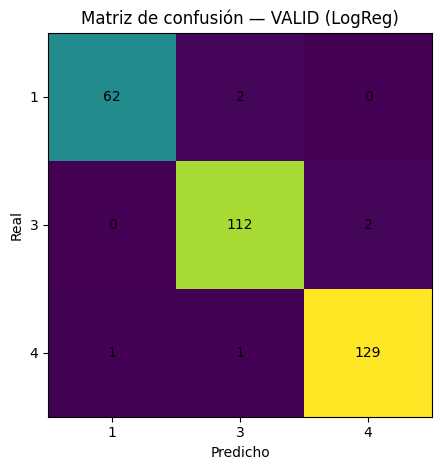

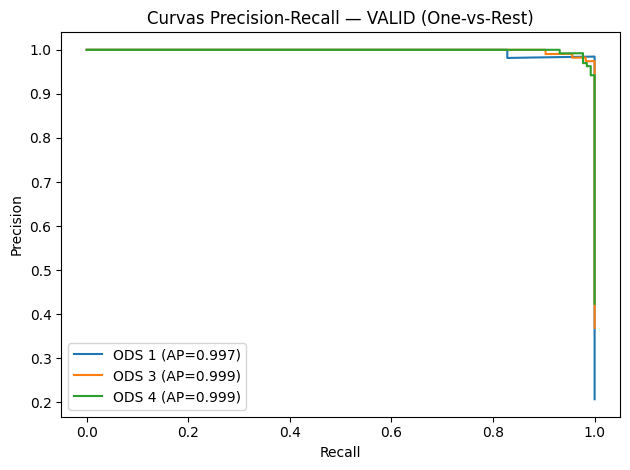

In [17]:
# ---------------- Evaluación en VALID ----------------
y_valid_pred = best_lr.predict(X_valid)
y_valid_proba = best_lr.decision_function(X_valid) if hasattr(best_lr, "decision_function") else best_lr.predict_proba(X_valid)

print("\nVALID — Macro F1:", round(f1_score(y_valid, y_valid_pred, average="macro"), 4))
print("\nVALID — Reporte por clase:")
print(classification_report(y_valid, y_valid_pred, digits=3))

# Matriz de confusión VALID
cm_v = confusion_matrix(y_valid, y_valid_pred, labels=sorted(np.unique(y_train)))
plt.figure()
plt.imshow(cm_v, interpolation="nearest")
plt.title("Matriz de confusión — VALID (LogReg)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.xticks(ticks=range(len(cm_v)), labels=sorted(np.unique(y_train)))
plt.yticks(ticks=range(len(cm_v)), labels=sorted(np.unique(y_train)))
for i in range(cm_v.shape[0]):
    for j in range(cm_v.shape[1]):
        plt.text(j, i, cm_v[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()

# Curvas Precision-Recall (VALID)
classes = sorted(np.unique(y_train))
plt.figure()
if hasattr(best_lr, "decision_function"):
    # decision_function devuelve 1D (binario) o 2D (multiclase ovr)
    scores = best_lr.decision_function(X_valid)
    if scores.ndim == 1:
        scores = scores.reshape(-1, 1)
else:
    scores = best_lr.predict_proba(X_valid)

# construir curvas en esquema One-vs-Rest
from sklearn.preprocessing import label_binarize
Y_valid_bin = label_binarize(y_valid, classes=classes)
for k, c in enumerate(classes):
    sk = scores[:, k]
    precision, recall, _ = precision_recall_curve(Y_valid_bin[:, k], sk)
    ap = average_precision_score(Y_valid_bin[:, k], sk)
    plt.plot(recall, precision, label=f"ODS {c} (AP={ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision-Recall — VALID (One-vs-Rest)")
plt.legend()
plt.tight_layout()
plt.show()


TEST — Macro F1: 0.9632

TEST — Reporte por clase:
              precision    recall  f1-score   support

           1      0.973     0.947     0.960        76
           3      0.969     0.948     0.958       134
           4      0.956     0.987     0.971       154

    accuracy                          0.964       364
   macro avg      0.966     0.961     0.963       364
weighted avg      0.964     0.964     0.964       364



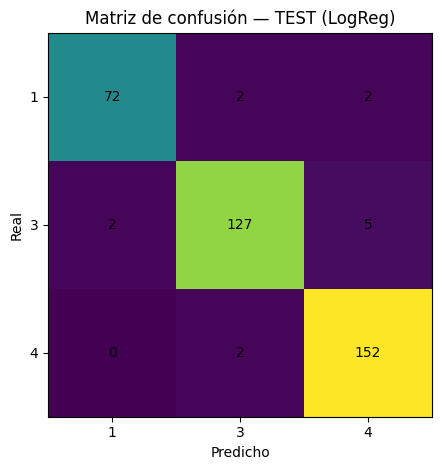

In [18]:
# ---------------- Evaluación en TEST ----------------
y_test_pred = best_lr.predict(X_test)
print("\nTEST — Macro F1:", round(f1_score(y_test, y_test_pred, average="macro"), 4))
print("\nTEST — Reporte por clase:")
print(classification_report(y_test, y_test_pred, digits=3))

cm_t = confusion_matrix(y_test, y_test_pred, labels=classes)
plt.figure()
plt.imshow(cm_t, interpolation="nearest")
plt.title("Matriz de confusión — TEST (LogReg)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.xticks(ticks=range(len(cm_t)), labels=classes)
plt.yticks(ticks=range(len(cm_t)), labels=classes)
for i in range(cm_t.shape[0]):
    for j in range(cm_t.shape[1]):
        plt.text(j, i, cm_t[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()

In [20]:
# ---------------- Explicabilidad: top términos por clase ----------------
# Para modelos lineales: coeficientes más altos por clase -> términos más indicativos
feature_names = np.array(tfidf.get_feature_names_out())
coefs = best_lr.coef_  # shape: (n_classes, n_features)
TOPK = 20

for idx, c in enumerate(classes):
    top_idx = np.argsort(coefs[idx])[-TOPK:]
    terms = feature_names[top_idx]
    weights = coefs[idx][top_idx]
    order = np.argsort(weights)
    terms = terms[order]
    weights = weights[order]
    print(f"\nTop {TOPK} términos indicativos para ODS {c}:")
    for t, w in zip(terms, weights):
        print(f"{t:30s}  {w: .4f}")


Top 20 términos indicativos para ODS 1:
tasa pobreza                     1.5505
relativo                         1.5730
multidimensional                 1.6132
pobreza infantil                 1.6650
vivienda                         1.6845
monetario                        1.6858
umbral                           1.7627
niño                             1.7665
familia                          1.7872
crecimiento                      1.8190
transferencia                    2.1068
protección                       2.2548
empleo                           2.2584
protección social                2.5513
privación                        3.0243
social                           3.0860
ingreso                          3.9137
hogar                            4.1616
pobre                            5.1432
pobreza                          11.1725

Top 20 términos indicativos para ODS 3:
salud mental                     1.5581
hospitalario                     1.5930
muerte                           1.63

# 6. Creación de un DataFrame con TF-IDF de palabras representativas y variable objetivo (NO EN USO)

Construiremos un nuevo DataFrame que contenga las columnas: `id`, las 20 palabras más comunes como columnas con valores TF-IDF y la variable categórica `labels`.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Las 20 palabras más frecuentes ya están en 'most_common_words'
top_20_words = [word for word, _ in most_common_words]

# Definir vectorizador TF-IDF con vocabulario limitado
vectorizer = TfidfVectorizer(vocabulary=top_20_words)

# Aplicar tf-idf sobre la columna original Description
tfidf_matrix = vectorizer.fit_transform(df['textos'].fillna(''))

# Convertir matriz tf-idf en DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=top_20_words)

# Construir DataFrame final con columnas indicadas
display(df.head())
final_df = pd.concat([df[['id', 'labels']], tfidf_df], axis=1)

print("Primeras filas del DataFrame final con TF-IDF y variable objetivo:")
display(final_df.head())

,id,textos,labels,text_length,tokens,texto_stemming,texto_lematizacion
0,1,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,352,"[aprendizaje, educacion, consideran, sinonimos...",aprendizaj educ consider sinon escolariz forma...,aprendizaje educación considerar sinónir escol...
1,2,Para los niños más pequeños (bebés y niños peq...,4,516,"[niños, pequeños, bebes, niños, pequeños, capa...",niñ mas pequeñ beb niñ pequeñ capacit especial...,niño pequeño bebé niño pequeño capacitación es...
2,3,"Además, la formación de especialistas en medic...",3,659,"[ademas, formacion, especialistas, medicina, g...",adem formacion especial medicin general tambi ...,formación especialista medicina general inclui...
3,4,En los países de la OCDE se tiende a pasar de ...,4,693,"[paises, ocde, tiende, pasar, cursos, obligato...",pais ocde tiend pas curs obligatori optat abie...,país ocde tender pasar curso obligatorio optat...
4,5,Este grupo se centró en las personas que padec...,3,608,"[grupo, centro, personas, padecen, trastornos,...",grup centr person padec trastorn mental comorb...,grupo centrar persona padecer trastorno mental...


Primeras filas del DataFrame final con TF-IDF y variable objetivo:


,id,labels,salud,pobreza,educacion,paises,atencion,estudiantes,ocde,escuelas,...,nivel,sistema,niños,personas,pueden,calidad,desarrollo,resultados,ingresos,aprendizaje
0,1,4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
1,2,4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.824416,0.000000,0.000000,0.401669,0.000000,0.398748,0.0,0.0
2,3,3,0.797943,0.0,0.0,0.0,0.0,0.000000,0.224408,0.000000,...,0.221196,0.0,0.000000,0.000000,0.225646,0.000000,0.000000,0.000000,0.0,0.0
3,4,4,0.000000,0.0,0.0,0.0,0.0,0.856613,0.290713,0.310243,...,0.000000,0.0,0.000000,0.000000,0.292318,0.000000,0.000000,0.000000,0.0,0.0
4,5,3,0.292323,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.324136,0.0,0.000000,0.349133,0.000000,0.000000,0.343207,0.000000,0.0,0.0
